**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

<ipython-input-7-015a807f8e1e>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Primeras filas del DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  


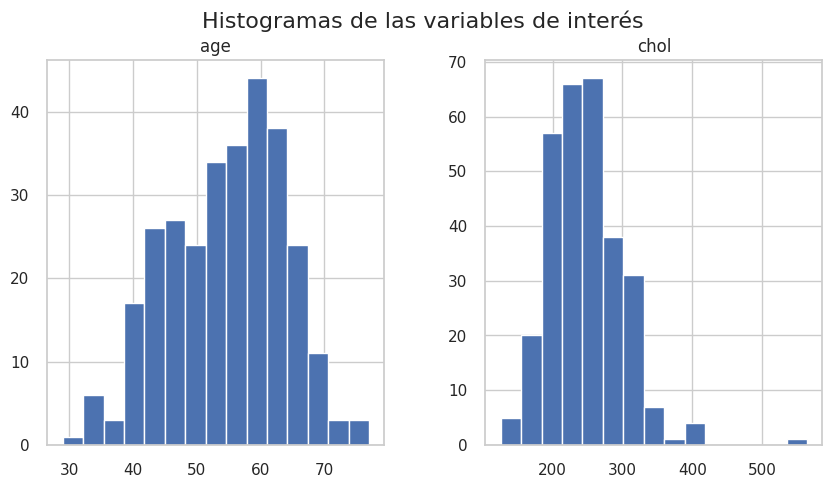

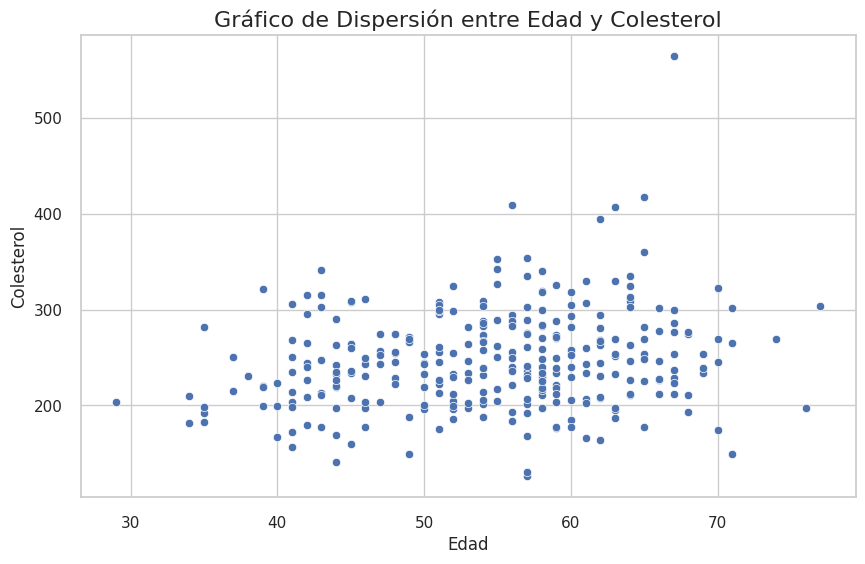

In [7]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos
plt.style.use('seaborn')
sns.set(style="whitegrid")

# Cargar los datos
file_path = 'heart_cleveland_upload.csv'  # Asegúrate de que el archivo está en la misma carpeta
data = pd.read_csv(file_path)

# Inspeccionar los datos
print("Primeras filas del DataFrame:")
print(data.head())

print("\nInformación del DataFrame:")
print(data.info())

print("\nValores nulos en el DataFrame:")
print(data.isnull().sum())

# Resumen estadístico
print("\nResumen estadístico:")
print(data.describe())

# Visualización: Histogramas de todas las variables numéricas (para las variables de interés)
data[['age', 'chol']].hist(bins=15, figsize=(10, 5))  # Cambia 'age' y 'chol' por las variables que quieras analizar
plt.suptitle('Histogramas de las variables de interés', fontsize=16)
plt.show()

# Visualización: Gráfico de dispersión entre dos variables (por ejemplo: 'age' y 'chol')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol')  # Cambia 'age' y 'chol' por las variables que quieras analizar
plt.title('Gráfico de Dispersión entre Edad y Colesterol', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.show()


**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [8]:
# Comprobar si hay registros duplicados
duplicates = data.duplicated().sum()
print(f"Registros duplicados: {duplicates}")

# Eliminar duplicados si existen
if duplicates > 0:
    data = data.drop_duplicates()

# Transformación de variables categóricas
# Convertimos 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' a tipo 'category'
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Normalización/Estandarización de variables numéricas
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()

# Estandarizar las variables numéricas
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Visualización de la transformación (opcional)
print("\nDatos después del preprocesamiento:")
print(data.describe())


Registros duplicados: 0

Datos después del preprocesamiento:
                age      trestbps          chol       thalach     oldpeak  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  297.000000   
mean  -1.196200e-16  5.024040e-16 -1.973730e-16  5.024040e-16    0.000000   
std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00    1.001688   
min   -2.827176e+00 -2.125634e+00 -2.337704e+00 -3.431849e+00   -0.906712   
25%   -7.241238e-01 -6.594306e-01 -7.002541e-01 -7.247694e-01   -0.906712   
50%    1.613719e-01 -9.550637e-02 -8.380217e-02  1.484822e-01   -0.219520   
75%    7.148067e-01  4.684179e-01  5.519138e-01  7.160957e-01    0.467672   
max    2.485798e+00  3.851964e+00  6.099981e+00  2.287949e+00    4.419026   

        condition  
count  297.000000  
mean     0.461279  
std      0.499340  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


**3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.**

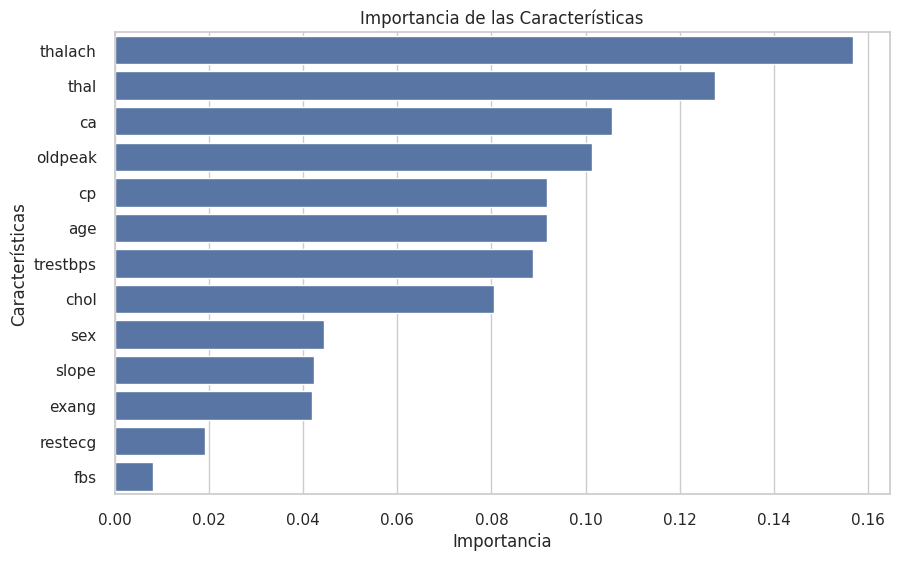

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Separar las características (X) y la variable objetivo (y)
X = data.drop('condition', axis=1)  # Todas las columnas menos 'condition'
y = data['condition']  # Variable objetivo

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Ajustar el modelo
model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Ordenar las características por su importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


**4. Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [10]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('condition', axis=1)  # Todas las columnas menos 'condition'
y = data['condition']  # Variable objetivo

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de datos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (237, 13)
Tamaño del conjunto de prueba: (60, 13)


**5. Entrenar el modelo configurando los diferentes hiperparámetros.**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Crear una instancia del modelo de Regresión Logística
model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("\nInforme de clasificación:\n", report)


Precisión del modelo: 0.7333333333333333

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



**6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.**

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)


Precisión del modelo: 0.7333333333333333
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



**7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo**

<Figure size 800x600 with 0 Axes>

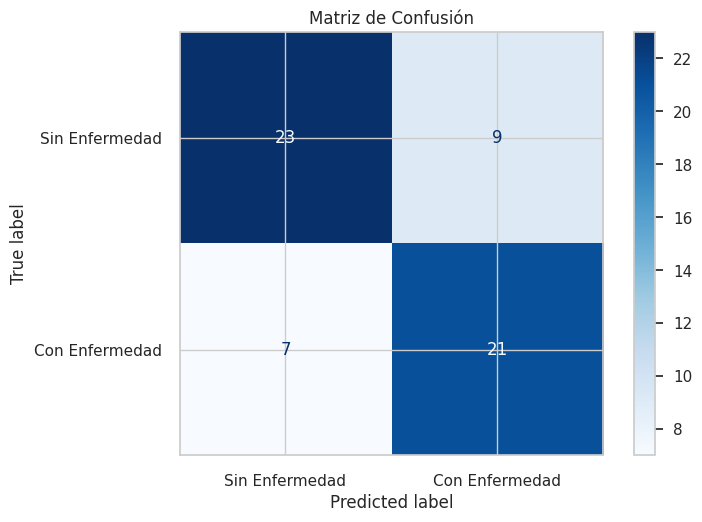

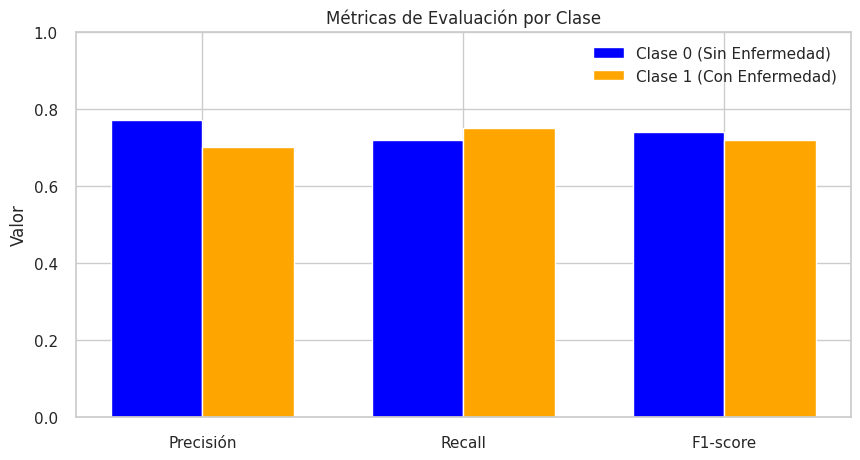

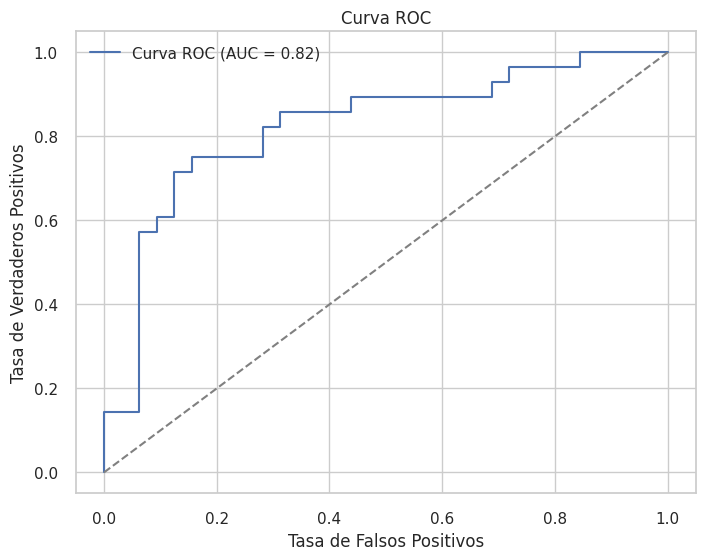

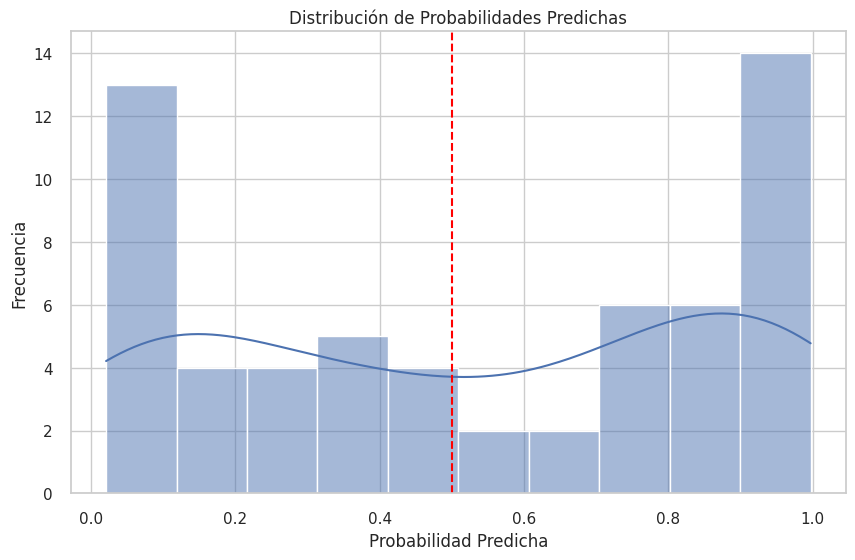

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Matriz de Confusión
y_pred = model.predict(X_test)  # Realizamos predicciones en el conjunto de prueba
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin Enfermedad', 'Con Enfermedad']).plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# 2. Gráfico de barras para las métricas de evaluación
metrics = ['Precisión', 'Recall', 'F1-score']
values = [0.77, 0.72, 0.74]  # Promedio de las métricas para la clase 0
values_1 = [0.70, 0.75, 0.72]  # Promedio de las métricas para la clase 1

bar_width = 0.35
x = np.arange(len(metrics))  # El eje x

plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, values, bar_width, label='Clase 0 (Sin Enfermedad)', color='blue')
plt.bar(x + bar_width/2, values_1, bar_width, label='Clase 1 (Con Enfermedad)', color='orange')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Valor')
plt.title('Métricas de Evaluación por Clase')
plt.legend()
plt.show()

# 3. Curva ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Obtener las probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# 4. Gráfico de distribución de probabilidades
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=10, kde=True)
plt.axvline(0.5, color='red', linestyle='--')  # Umbral de decisión
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades Predichas')
plt.show()
